Copy of play.ipynb to save results from round 3

Players

In [7]:
from policies.dummy import Dummy
from policies.do import Do
from policies.ivo import Ivo
from policies.carlos import Carlos
from policies.jakko import Jakko
from policies.mark0 import Mark0
from policies.mark1 import Mark1
import matplotlib.pyplot as plt

from games.minority import Minority
from games.tron import Tron
from games.battleship import Battleship
from games.wonky_rps import WonkyRPS

from itertools import combinations

def get_all_player_classes():
    """
    Here we define all the players that are available to be used in the tournament.
    """
    return [
        Do,
        Ivo,
        Carlos,
        Mark1,
    ]

def init_all_players():
    return [
        player() for player in get_all_player_classes()
    ]

def get_zero_scores(players):
    return {
        player.name: 0
        for player in players
    }

global_scores = get_zero_scores(init_all_players())

def print_ordered_scores(scores: dict[str, int]):
    """
    Ranks the scores dict by score
    """
    ordered_scores = sorted(scores.items(), key=lambda item: item[1], reverse=True)
    print("Scores: " + ", ".join([f"{name}: {score}" for name, score in ordered_scores]))

def print_global_scores():
    ordered_scores = sorted(global_scores.items(), key=lambda item: item[1], reverse=True)
    print("Global scores:")
    for name, score in ordered_scores:
        print(f"{name}: {score}")

def update_global_scores(scores: dict[str, int]):
    """
    Ranks the scores dict by score
    """
    sorted_scores = sorted(scores.items(), key=lambda item: item[1], reverse=True)
    last_score = None
    current_points = len(init_all_players()) - 1
    for name, score in sorted_scores:
        if last_score is not None and last_score != score:
            current_points -= 1
        global_scores[name] += current_points

        last_score = score
    
    print_global_scores()

## Minority

In [8]:
scores = get_zero_scores(init_all_players())

for i in range(21):
    players = init_all_players()

    minority = Minority(players, render=False)

    winners = minority.play_game()

    for winner in winners:
        scores[winner] += 1

    print(minority.get_scores(), f"winner: {winners}")

print_ordered_scores(scores)

update_global_scores(scores)

{'do': 10, 'ivo': 14, 'carlos': 13, 'mark1': 15} winner: ['mark1']
{'do': 17, 'ivo': 14, 'carlos': 11, 'mark1': 9} winner: ['do']
{'do': 14, 'ivo': 13, 'carlos': 8, 'mark1': 15} winner: ['mark1']
{'do': 15, 'ivo': 8, 'carlos': 13, 'mark1': 14} winner: ['do']
{'do': 16, 'ivo': 17, 'carlos': 20, 'mark1': 8} winner: ['carlos']
{'do': 14, 'ivo': 9, 'carlos': 12, 'mark1': 9} winner: ['do']
{'do': 14, 'ivo': 8, 'carlos': 7, 'mark1': 20} winner: ['mark1']
{'do': 19, 'ivo': 14, 'carlos': 10, 'mark1': 15} winner: ['do']
{'do': 13, 'ivo': 14, 'carlos': 13, 'mark1': 17} winner: ['mark1']
{'do': 5, 'ivo': 10, 'carlos': 15, 'mark1': 17} winner: ['mark1']
{'do': 5, 'ivo': 14, 'carlos': 20, 'mark1': 13} winner: ['carlos']
{'do': 12, 'ivo': 7, 'carlos': 18, 'mark1': 11} winner: ['carlos']
{'do': 12, 'ivo': 13, 'carlos': 12, 'mark1': 14} winner: ['mark1']
{'do': 7, 'ivo': 12, 'carlos': 16, 'mark1': 15} winner: ['carlos']
{'do': 10, 'ivo': 9, 'carlos': 9, 'mark1': 11} winner: ['mark1']
{'do': 14, 'ivo':

## Tron

In [9]:
scores = get_zero_scores(init_all_players())

player_classes = get_all_player_classes()

for player1_class, player2_class in combinations(player_classes, 2):
    for i in range(11):
        player1 = player1_class()
        player2 = player2_class()

        tron = Tron([player1, player2], render=False)
        winner = tron.play_game()
        if winner == "tie":
            continue

        scores[winner] += 1

print_ordered_scores(scores)

update_global_scores(scores)

Scores: carlos: 27, mark1: 18, ivo: 16, do: 5
Global scores:
mark1: 5
carlos: 4
do: 2
ivo: 1


## Battleship

In [10]:
scores = get_zero_scores(init_all_players())

player_classes = get_all_player_classes()

for player1_class, player2_class in combinations(player_classes, 2):
    for i in range(11):
        player1 = player1_class()
        player2 = player2_class()
        
        battleship = Battleship(player1=player1, player2=player2, render=False)
        winner = battleship.play_game()

        print(f"Players: {player1.name} vs {player2.name}, Winner: {winner}")

        if winner == "tie":
            continue
        scores[winner] += 1

print_ordered_scores(scores)

update_global_scores(scores)

Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs ivo, Winner: ivo
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs carlos, Winner: carlos
Players: do vs mark1, Winner: mark1
Players: do vs mark1, Winner: mark1
Players: do vs mark1, Winner: mark1
Players: do vs mark1, Winner: mark1
Players: do vs mark1, Winner: mark1
Players: do vs mark1, Winner: mark1
Players: do vs

## Wonky RPS

{'do': 12014, 'ivo': 17535} , Winner: ivo


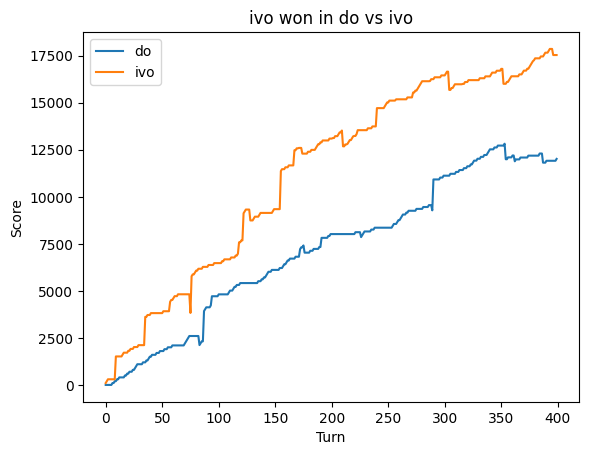

{'do': 20778, 'ivo': 22744} , Winner: ivo


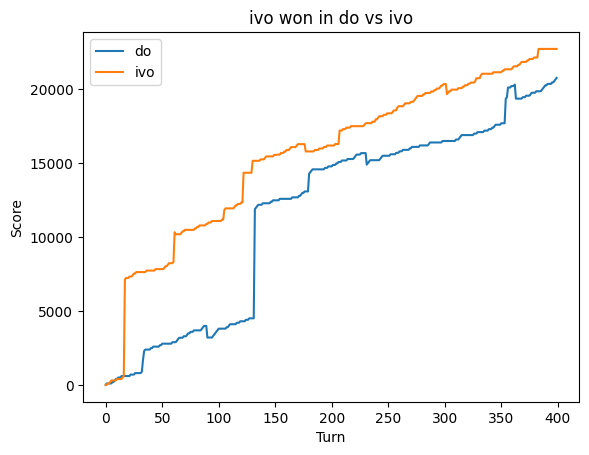

{'do': 19190, 'ivo': 18945} , Winner: do


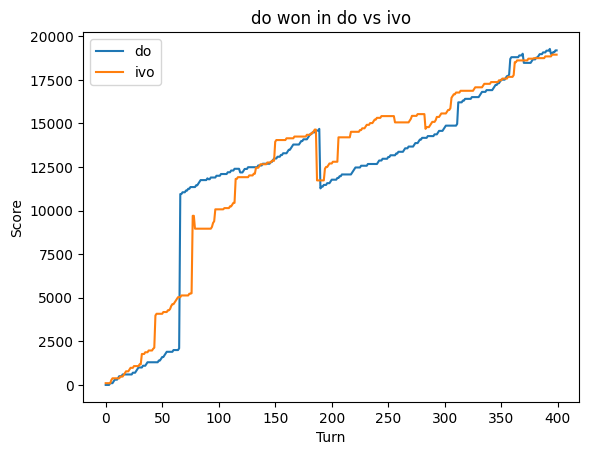

{'do': 12048, 'ivo': 47249} , Winner: ivo


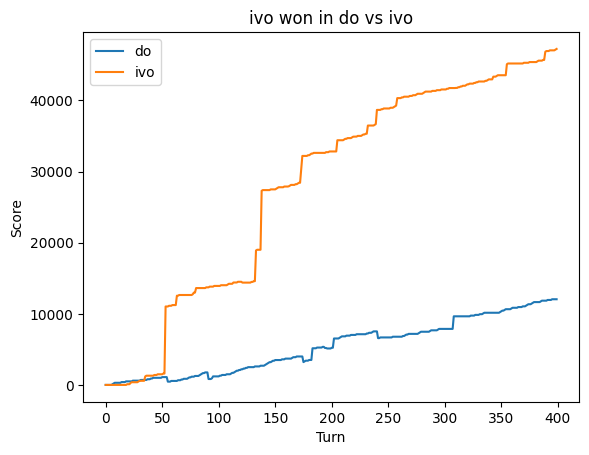

{'do': 19467, 'ivo': 26134} , Winner: ivo


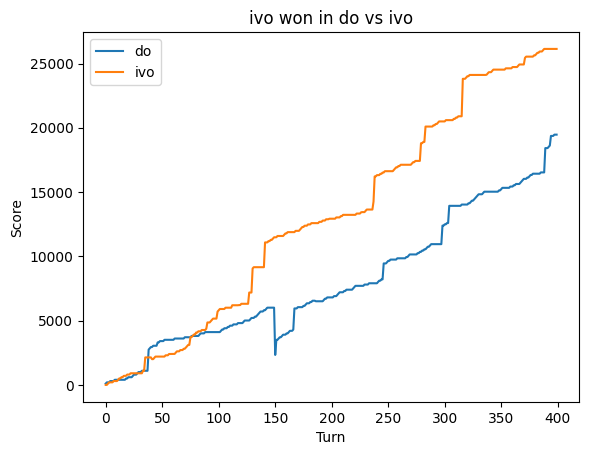

{'do': 10656, 'ivo': 32571} , Winner: ivo


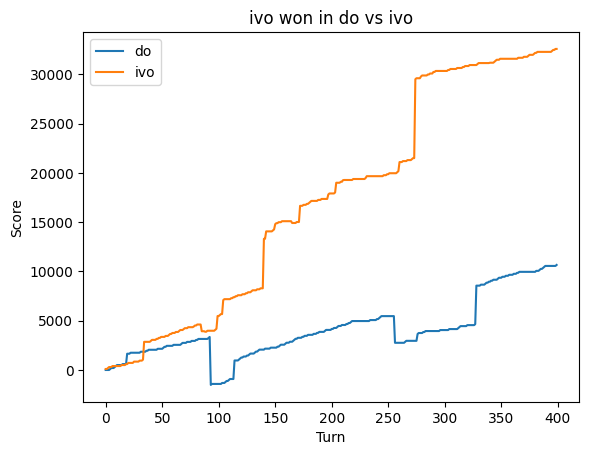

{'do': 23941, 'ivo': 25532} , Winner: ivo


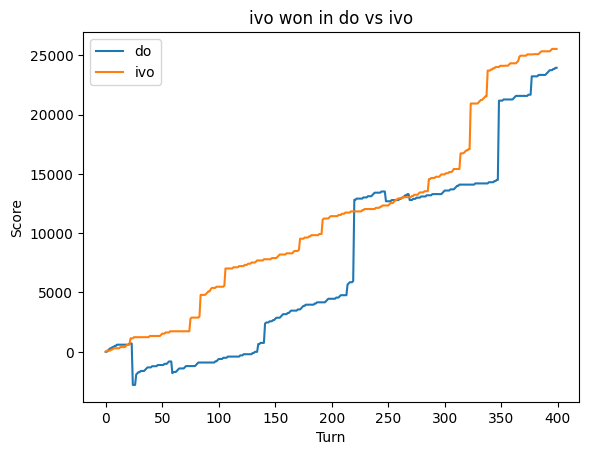

{'do': 10342, 'carlos': 46307} , Winner: carlos


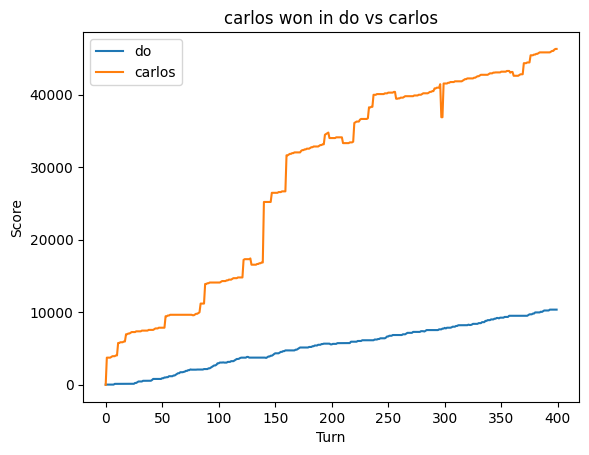

{'do': 11033, 'carlos': 29226} , Winner: carlos


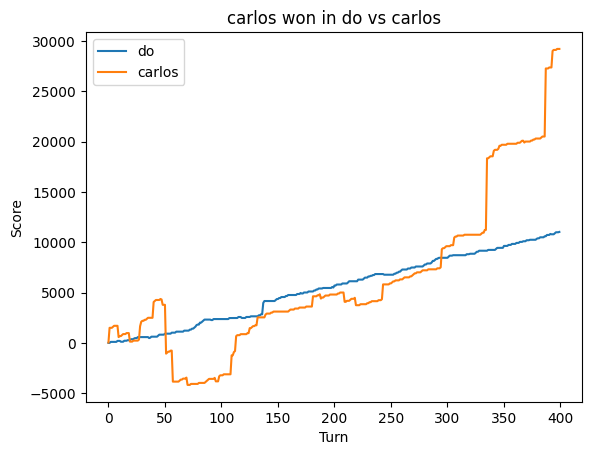

{'do': 9657, 'carlos': 25965} , Winner: carlos


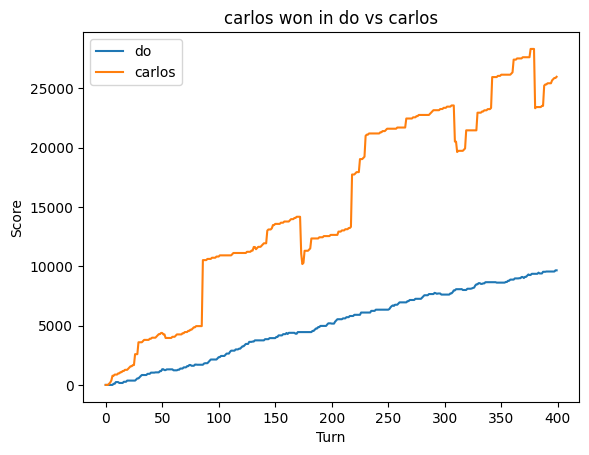

{'do': 12807, 'carlos': 38457} , Winner: carlos


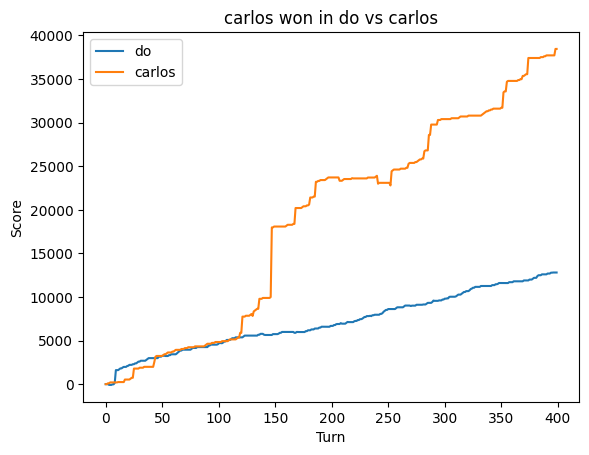

{'do': 10950, 'carlos': 32769} , Winner: carlos


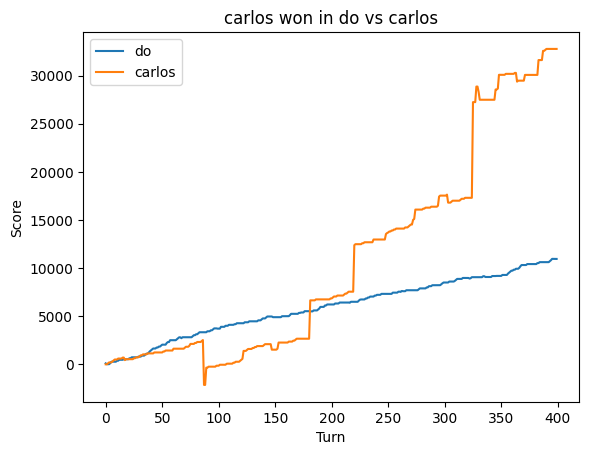

{'do': 11860, 'carlos': 63956} , Winner: carlos


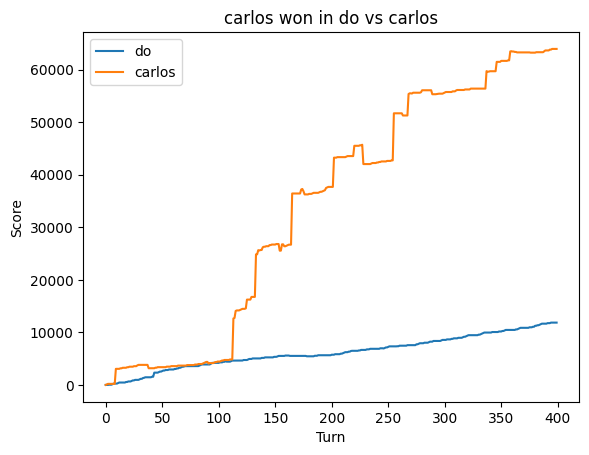

{'do': 10045, 'carlos': 26046} , Winner: carlos


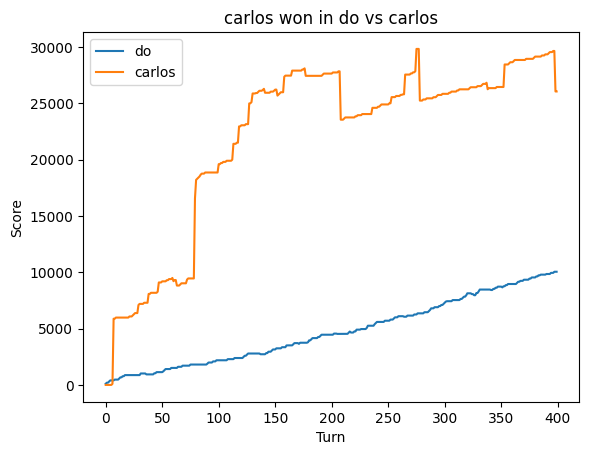

{'do': 15197, 'mark1': 18884} , Winner: mark1


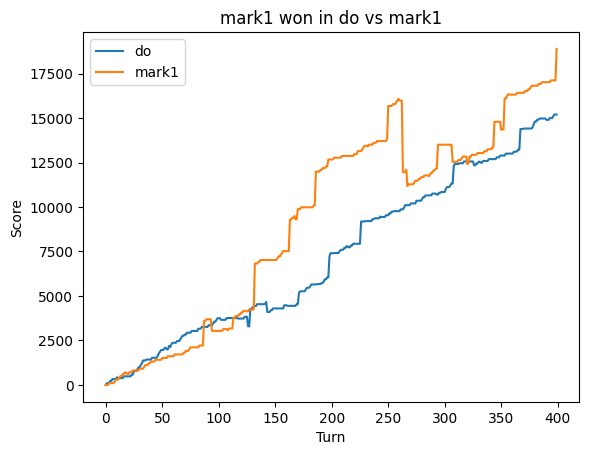

{'do': 15068, 'mark1': 52032} , Winner: mark1


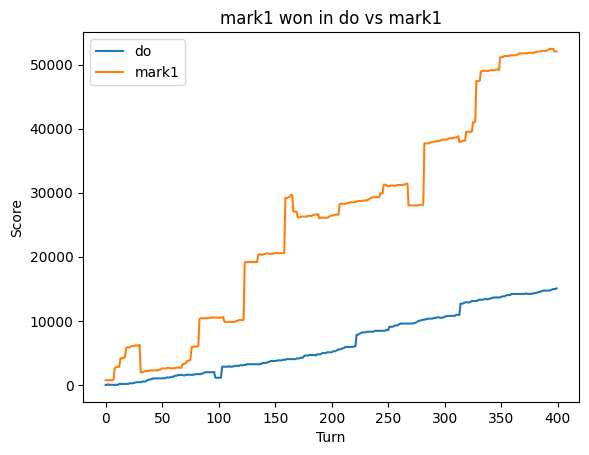

{'do': 19911, 'mark1': 37528} , Winner: mark1


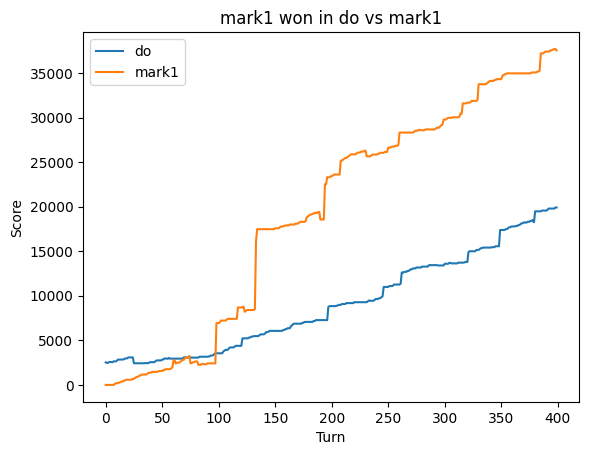

{'do': 12734, 'mark1': 46822} , Winner: mark1


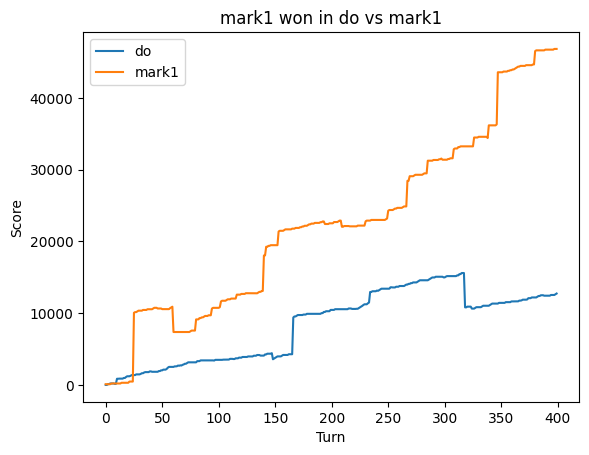

{'do': 16325, 'mark1': 27921} , Winner: mark1


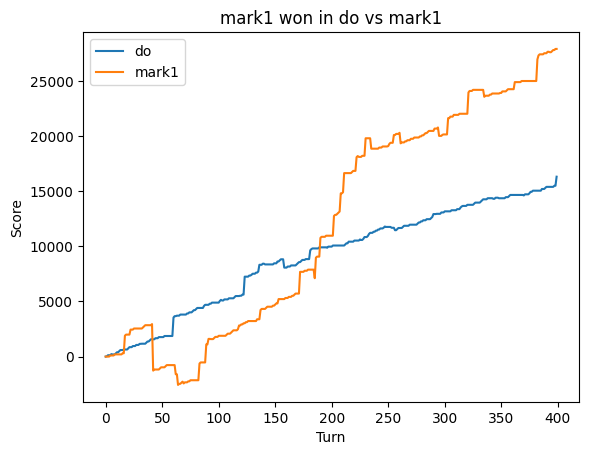

{'do': 10804, 'mark1': 39409} , Winner: mark1


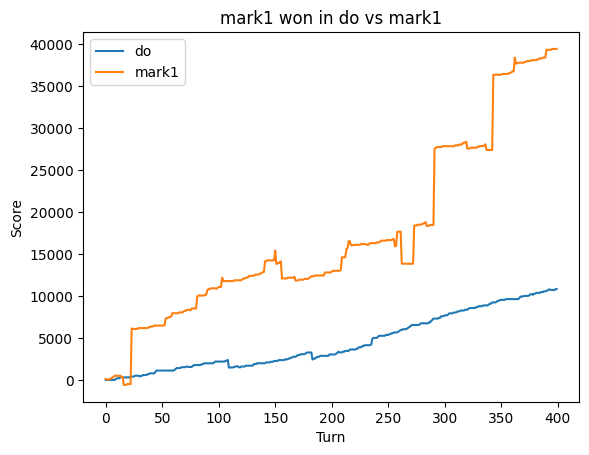

{'do': 14375, 'mark1': 44234} , Winner: mark1


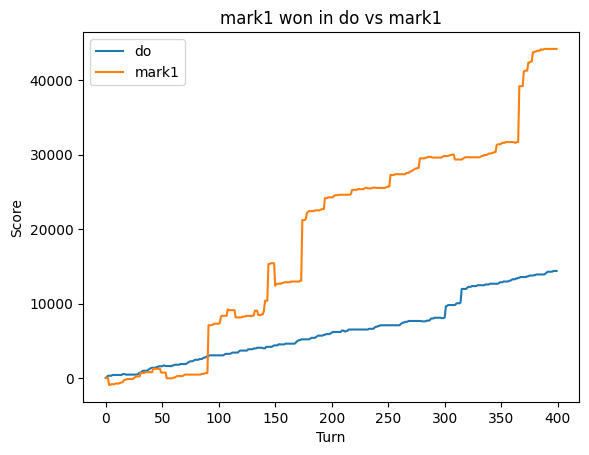

{'ivo': 5328, 'carlos': 40124} , Winner: carlos


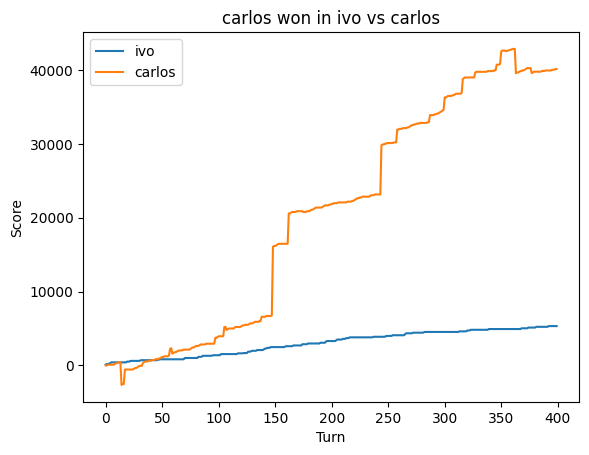

{'ivo': 6071, 'carlos': 44836} , Winner: carlos


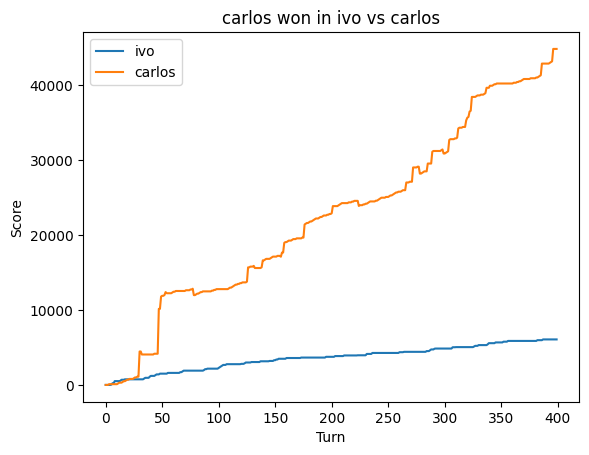

{'ivo': 3608, 'carlos': 39501} , Winner: carlos


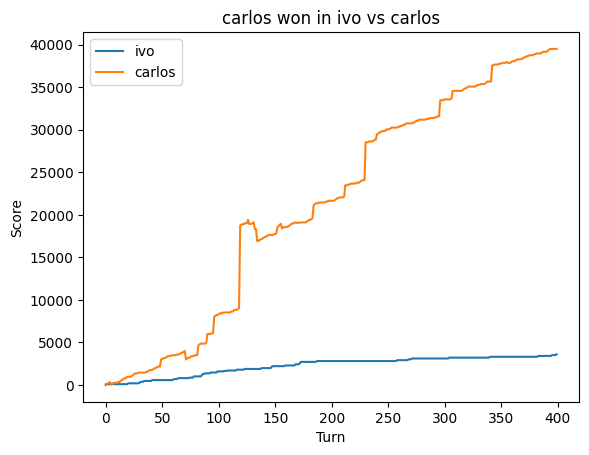

{'ivo': 6972, 'carlos': 13262} , Winner: carlos


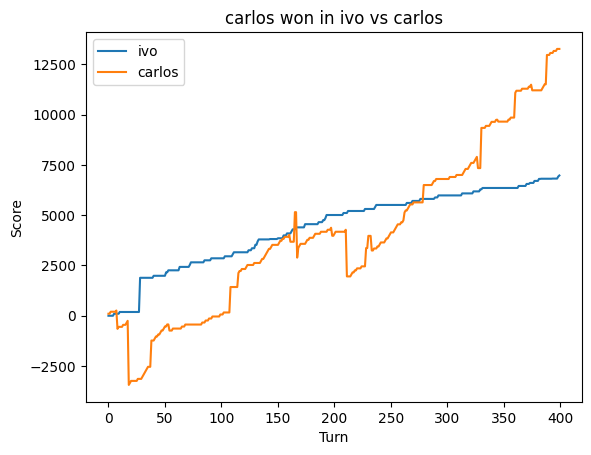

{'ivo': 5014, 'carlos': 35111} , Winner: carlos


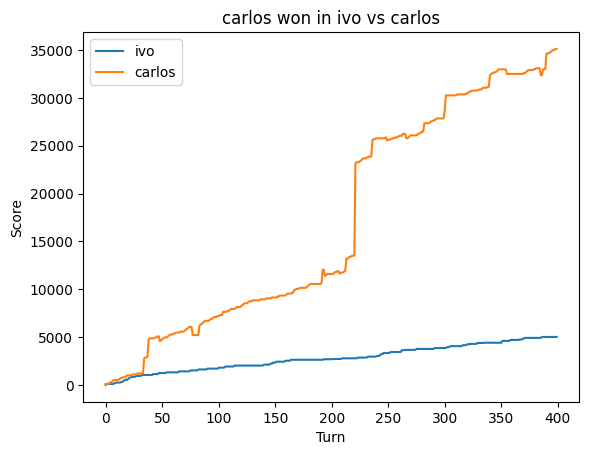

{'ivo': 4134, 'carlos': 48059} , Winner: carlos


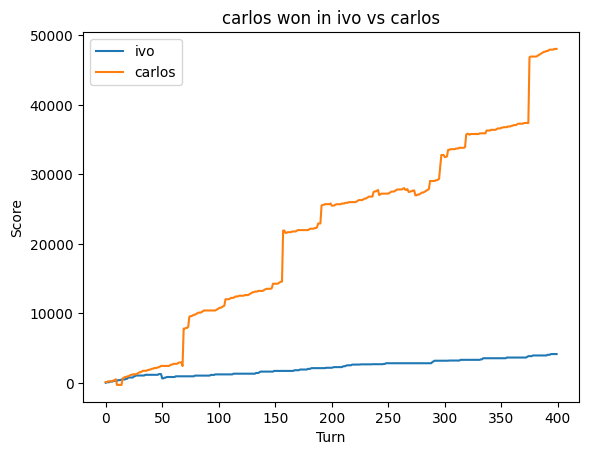

{'ivo': 4519, 'carlos': 29625} , Winner: carlos


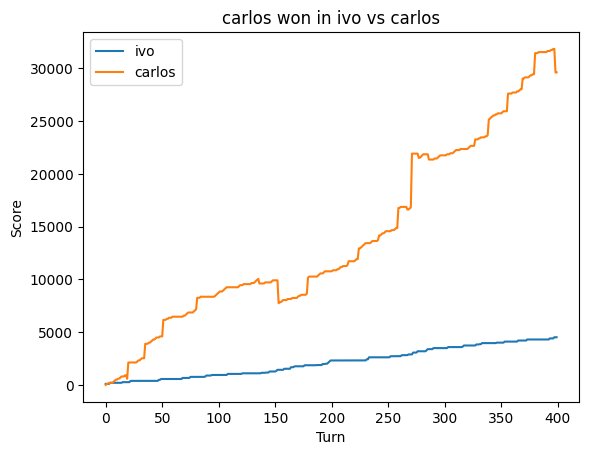

{'ivo': 9984, 'mark1': 47534} , Winner: mark1


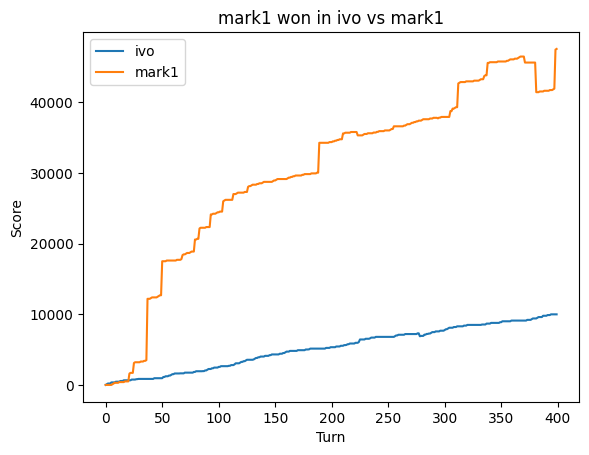

{'ivo': 10844, 'mark1': 24397} , Winner: mark1


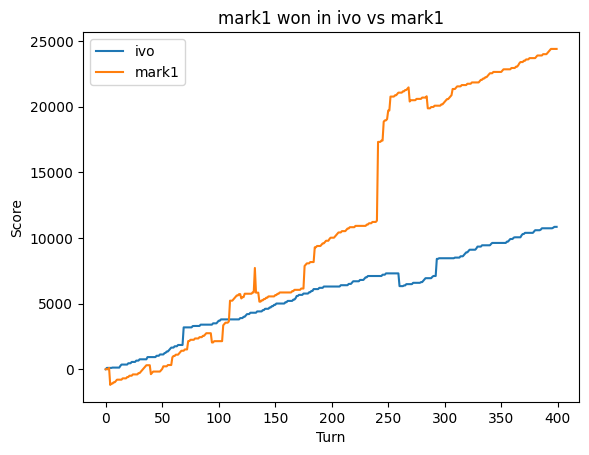

{'ivo': 10388, 'mark1': 37023} , Winner: mark1


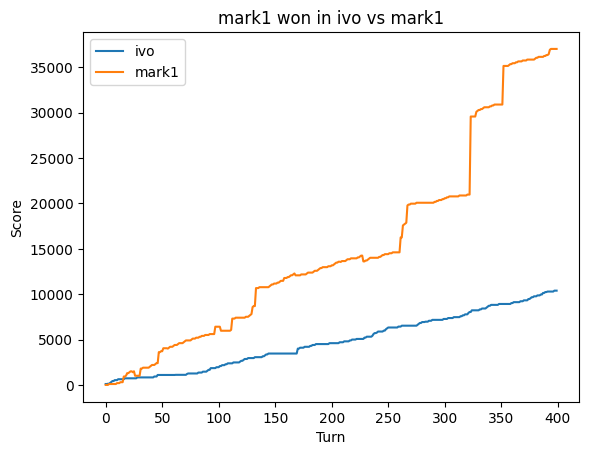

{'ivo': 11908, 'mark1': 34973} , Winner: mark1


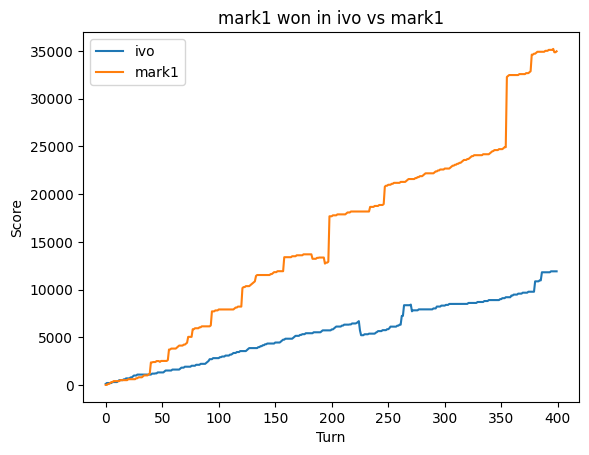

{'ivo': 11627, 'mark1': 35282} , Winner: mark1


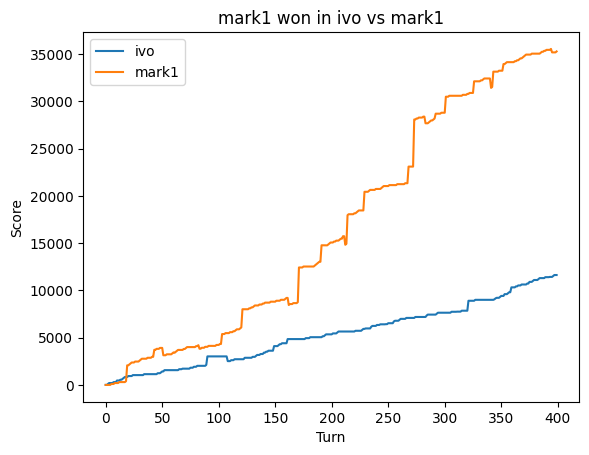

{'ivo': 17124, 'mark1': 38668} , Winner: mark1


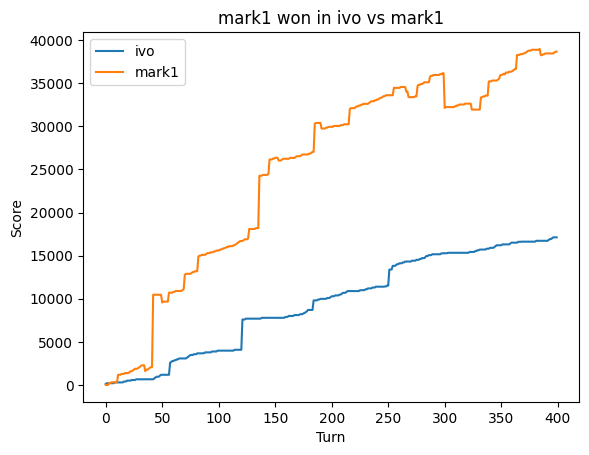

{'ivo': 19815, 'mark1': 49866} , Winner: mark1


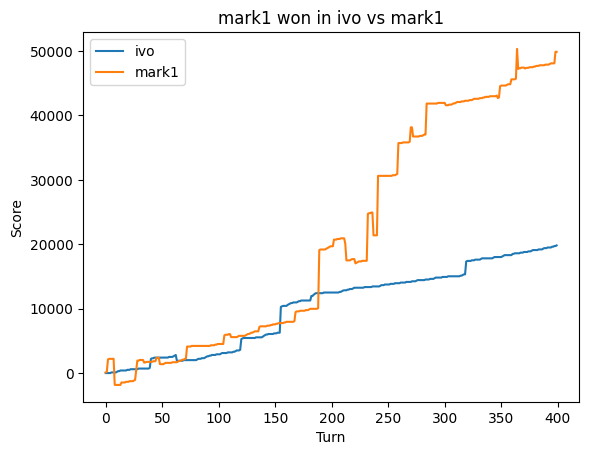

{'carlos': 20219, 'mark1': 7423} , Winner: carlos


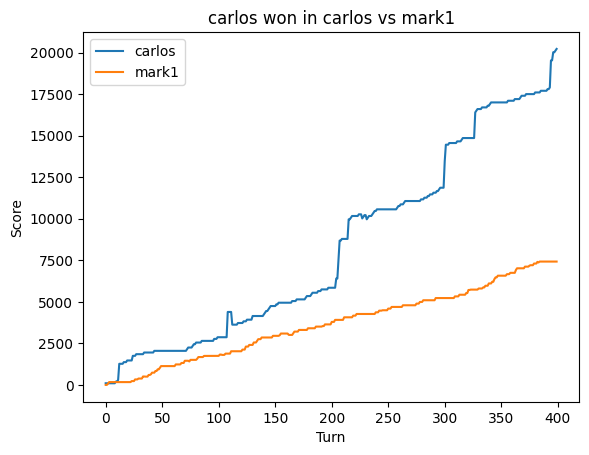

{'carlos': 13997, 'mark1': 9921} , Winner: carlos


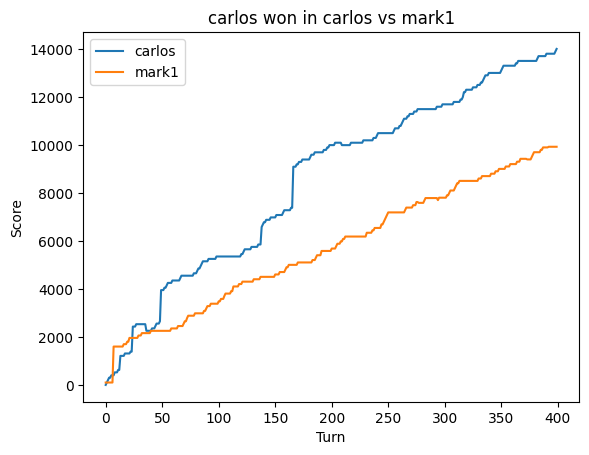

{'carlos': 17394, 'mark1': 9166} , Winner: carlos


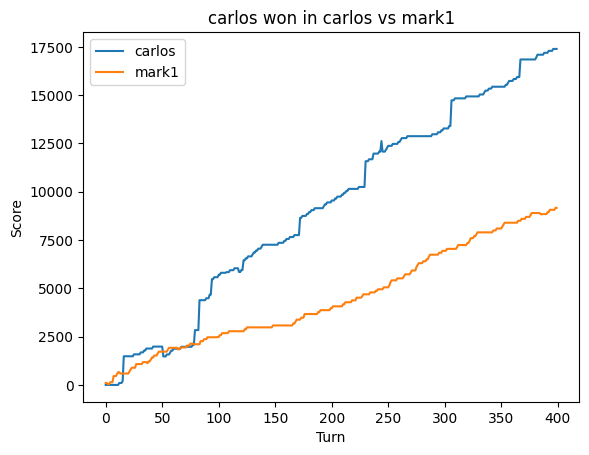

{'carlos': 12058, 'mark1': 16197} , Winner: mark1


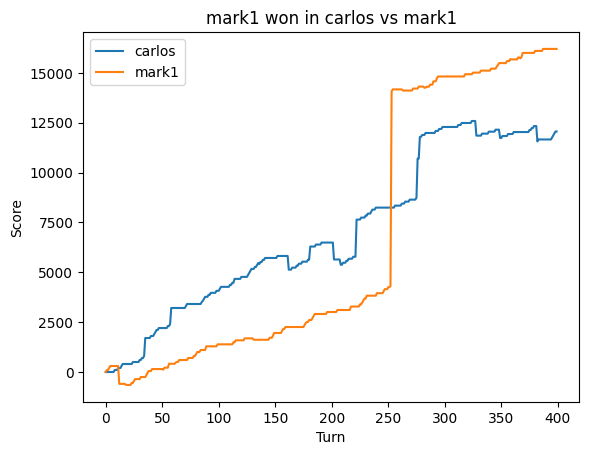

{'carlos': 16471, 'mark1': 11124} , Winner: carlos


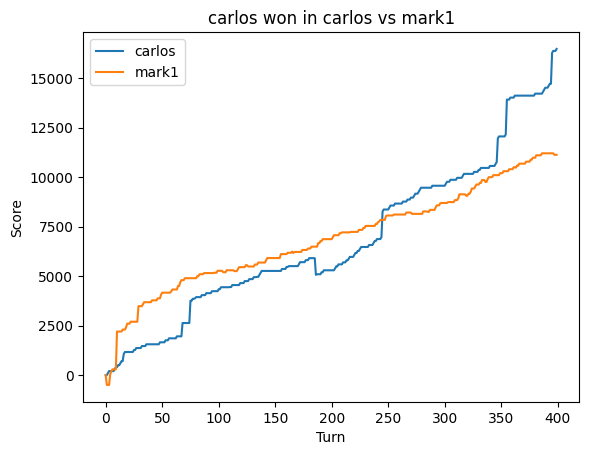

{'carlos': 17923, 'mark1': 6768} , Winner: carlos


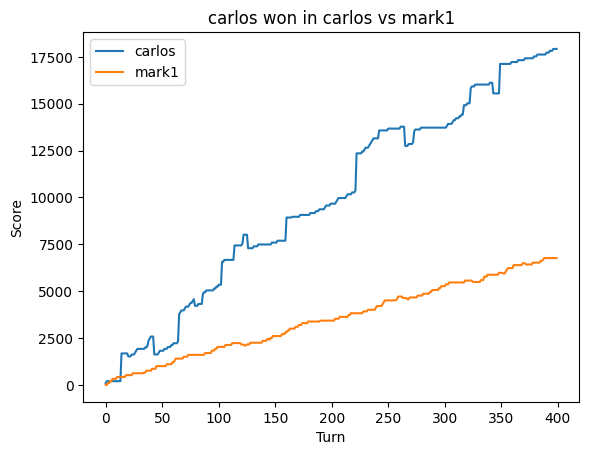

{'carlos': 22189, 'mark1': 7526} , Winner: carlos


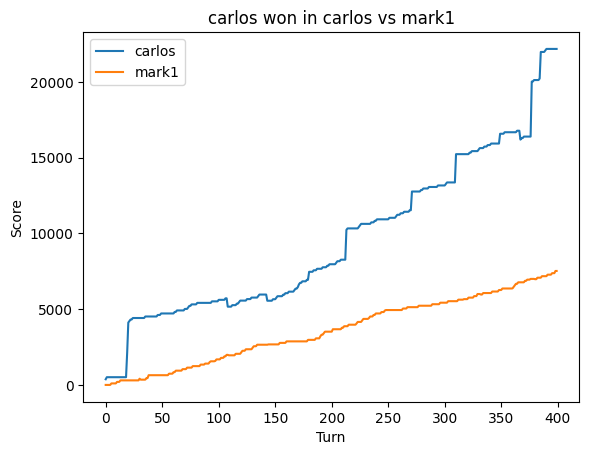

Scores: carlos: 20, mark1: 15, ivo: 6, do: 1
Global scores:
carlos: 10
mark1: 8
ivo: 4
do: 2


In [11]:
scores = get_zero_scores(init_all_players())

player_classes = get_all_player_classes()

for player1_class, player2_class in combinations(player_classes, 2):
    for i in range(7):
        player1 = player1_class()
        player2 = player2_class()

        wonky_rps = WonkyRPS(player1, player2, render=False)
        winner = wonky_rps.play_game()

        print(wonky_rps.scores, f", Winner: {winner}")

        history = wonky_rps.history
        p1 = player1.name + "_score"
        p2 = player2.name + "_score"
        p1_score = history[p1]
        p2_score = history[p2]
        turn = range(400)

        # plot them
        plt.plot(turn, p1_score, label=player1.name)
        plt.plot(turn, p2_score, label=player2.name)
        plt.xlabel("Turn")
        plt.ylabel("Score")
        plt.legend()
        plt.title(f"{winner} won in {player1.name} vs {player2.name}")
        plt.show()

        if winner == "tie":
            continue
    
        scores[winner] += 1

print_ordered_scores(scores)

update_global_scores(scores)

In [ ]:
print_global_scores()

Scores after round 2:

mark1: 19
carlos: 17
ivo: 10
do: 9

Scores round 3 (count double):

carlos: 10
mark1: 8
ivo: 4
do: 2

Final scores:
carlos: 37
mark1: 35
ivo: 18
do: 13